In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.owner.value_counts()

,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [ ]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df.sample()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1034,Honda CB Unicorn,38000,2017,Individual,1st owner,38600,72000.0


In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [ ]:
df.seller_type = df.seller_type.map({'Individual' : 1, 'Dealer' : 2})

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,int64
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df.ex_showroom_price.isnull().sum()

435

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,int64
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df.ex_showroom_price.isnull().sum()

435

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,int64
owner,object
km_driven,int64
ex_showroom_price,float64


1. What is the range of selling prices in the dataset?

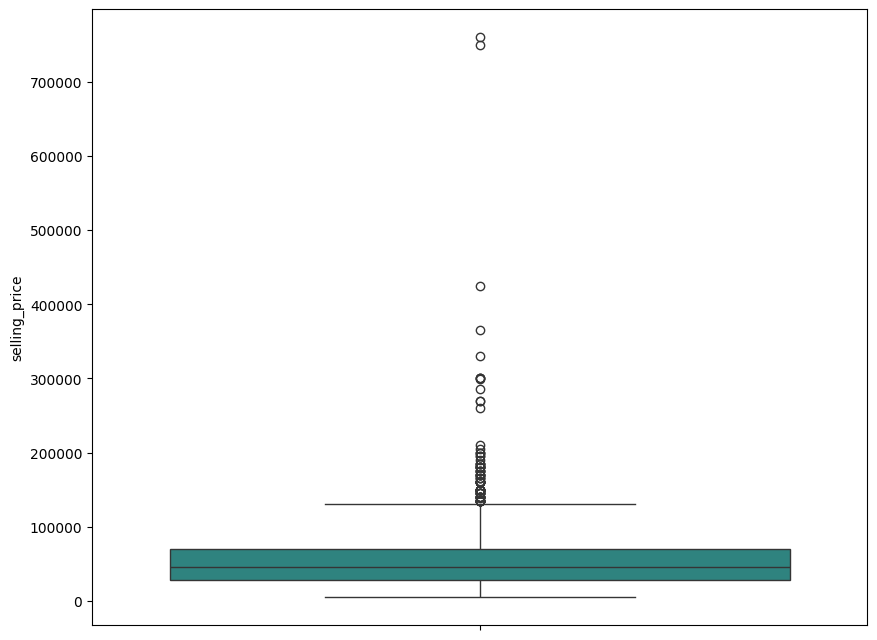

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df.selling_price, palette='viridis')
plt.show()


Ans:- Insight:-
  
*`  The range of selling prices in the dataset between 0 to 1.5 lacs. There are some outliers present in this dataset.`*

2. What is the median selling price for the bikes in the dataset?

In [ ]:
df.selling_price.median()

45000.0

Ans:-



```
*Median selling price for the bike is 45,000*
```



3. What is the most common seller type?

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.seller_type.value_counts()

,count
seller_type,
1,1055
2,6


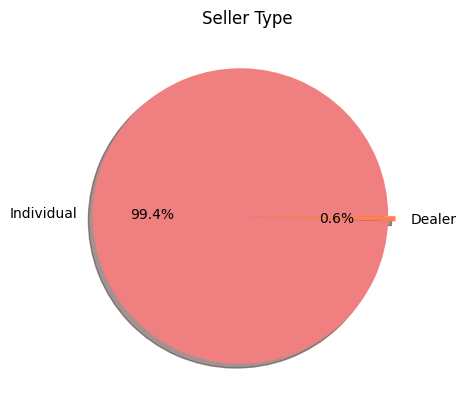

In [ ]:
plt.pie(df.seller_type.value_counts(), labels=['Individual', 'Dealer'], autopct='%1.1f%%', shadow = True, explode = [0.05, 0.0], colors= ['lightcoral','coral'])
plt.title('Seller Type')
plt.show()

Ans:-

Insight:- In plot or value counts we can see 99.4% sellers are individual.

4. How many bikes have driven more than 50,000 kms?

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
km = []
for kms in df.km_driven:
  if kms > 50000:
    km.append(kms)


In [ ]:
len(km)

170

Ans:-



```
*170 bikes have driven more than 50,000 kms*
```



5. What is the average km_driven value for each ownership type?

In [ ]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


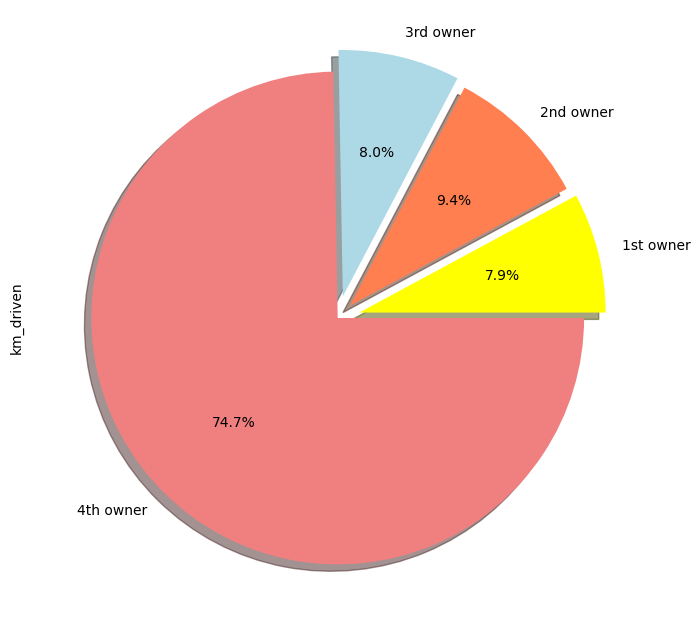

In [ ]:
df.groupby('owner')['km_driven'].mean().plot.pie(figsize=(10,8), autopct='%1.1f%%', shadow = True, explode = [0.09,0.07,0.09, 0], colors= ['yellow','coral','lightblue','lightcoral'])
plt.show()

Ans:-



```
*The average km_driven value for each ownership type is

4th Owner = 311500 that is 74.7%
3rd Owner = 33292.181818 that is 8.0%
2nd Owner = 39288 that is 9.4%
1st Owner = 32816 that is 7.9%
*
```



6. What proportion of bikes are from the year 2015 or older?




In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
st = df.year.value_counts()

In [ ]:
def proportion_of_bikes_2015_or_older(df):
    """Calculates the proportion of bikes from 2015 or older in the DataFrame.

    Args:
        df: pandas DataFrame with a 'year' column.

    Returns:
        float: The proportion of bikes from 2015 or older.
    """
    bikes_2015_or_older = df[df['year'] <= 2015]['year'].count()
    total_bikes = len(df)

    if total_bikes == 0:
        return 0
    return bikes_2015_or_older / total_bikes

# Example usage:
proportion = proportion_of_bikes_2015_or_older(df)
print(f"Proportion of bikes from 2015 or older: {proportion:.2f}")

Proportion of bikes from 2015 or older: 0.57


In [ ]:
year = df.groupby('year')['name'].count()

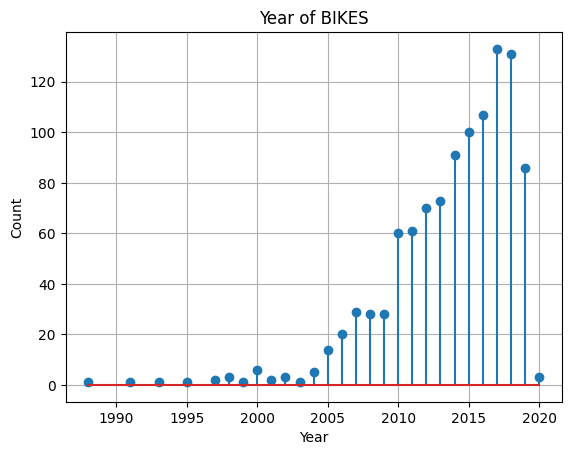

In [ ]:
plt.stem(st.index, st)
plt.title('Year of BIKES')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

7. What is the trend of missing values across the dataset?

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
[df.owner.isnull().sum(), df.ex_showroom_price.isnull().sum(), df.km_driven.isnull().sum(), df.year.isnull().sum()]

[0, 435, 0, 0]

In [ ]:

missing_values = df.isnull().sum()

missing_percentage = (df.isnull().mean() * 100)


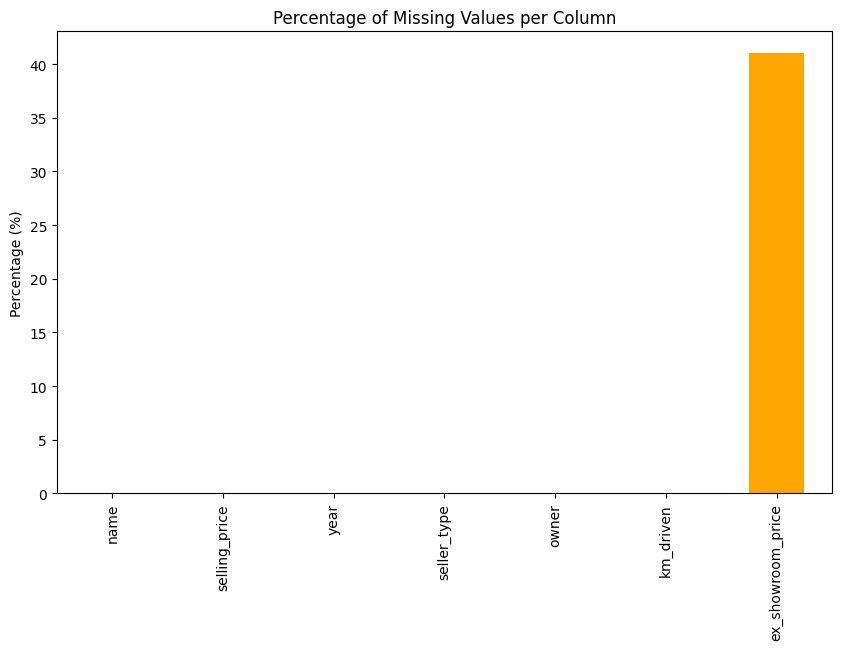

In [ ]:
missing_percentage.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage (%)")
plt.show()


8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
df.loc[df.ex_showroom_price.idxmax()]

,134
name,Harley-Davidson Street Bob
selling_price,750000
year,2013
seller_type,1
owner,2nd owner
km_driven,12000
ex_showroom_price,1278000.0


Ans:-



```
*Here ex_showroom_price of bike is 12,78,000 and Bike name is Harley-Davidson Street Bob*
```



9. What is the total no of bikes listed by each seller type?

In [ ]:
df.seller_type.value_counts()

,count
seller_type,
1,1055
2,6


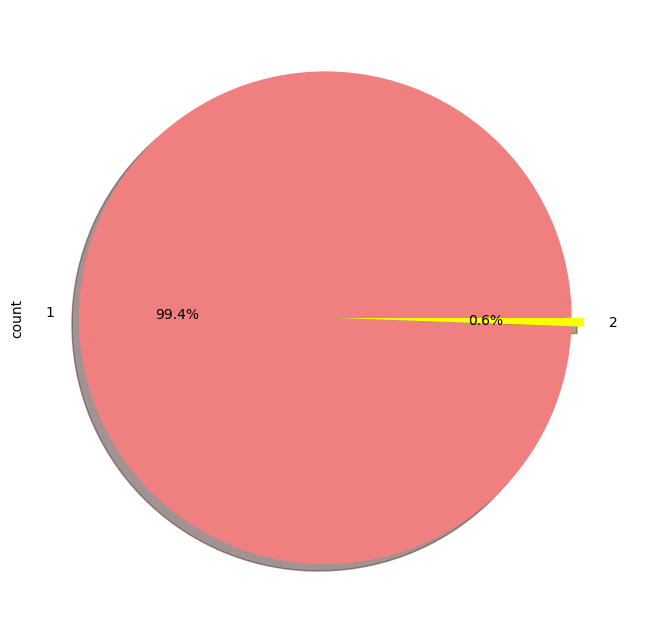

In [ ]:
df.seller_type.value_counts().plot.pie(figsize=(10,8), autopct='%1.1f%%', shadow = True, explode = [0.05, 0.0], colors= ['lightcoral','yellow'])
plt.show()

10. What is the relationship between selling_price and km_driven for first-owner bikes?

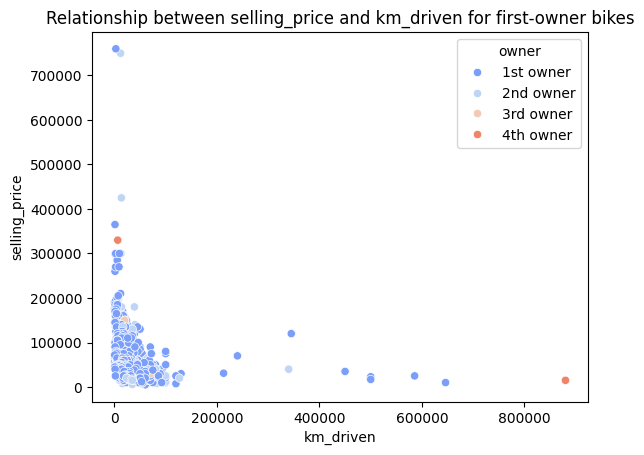

In [ ]:
sns.scatterplot(x=df.km_driven, y=df.selling_price, hue=df.owner, palette='coolwarm')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show()

Ans:-

```
*Most of First owner drives his bike between 0 to 2 lac and selling price also between the 0 and 2 lac*
```



In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

11. Identify and remove outliers in the km_driven column using the IQR.

In [ ]:
Q1 = np.quantile(df['km_driven'], 0.75)
Q3 = np.quantile(df['km_driven'], 0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
cleaned_data = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [ ]:
print(f"Number of outliers removed: {len(outliers)}")
print(f"Remaining rows after removing outliers: {len(cleaned_data)}")

Number of outliers removed: 1061
Remaining rows after removing outliers: 0


12. Perform bivariate analysis to visualize the relationship between year and selling_price.

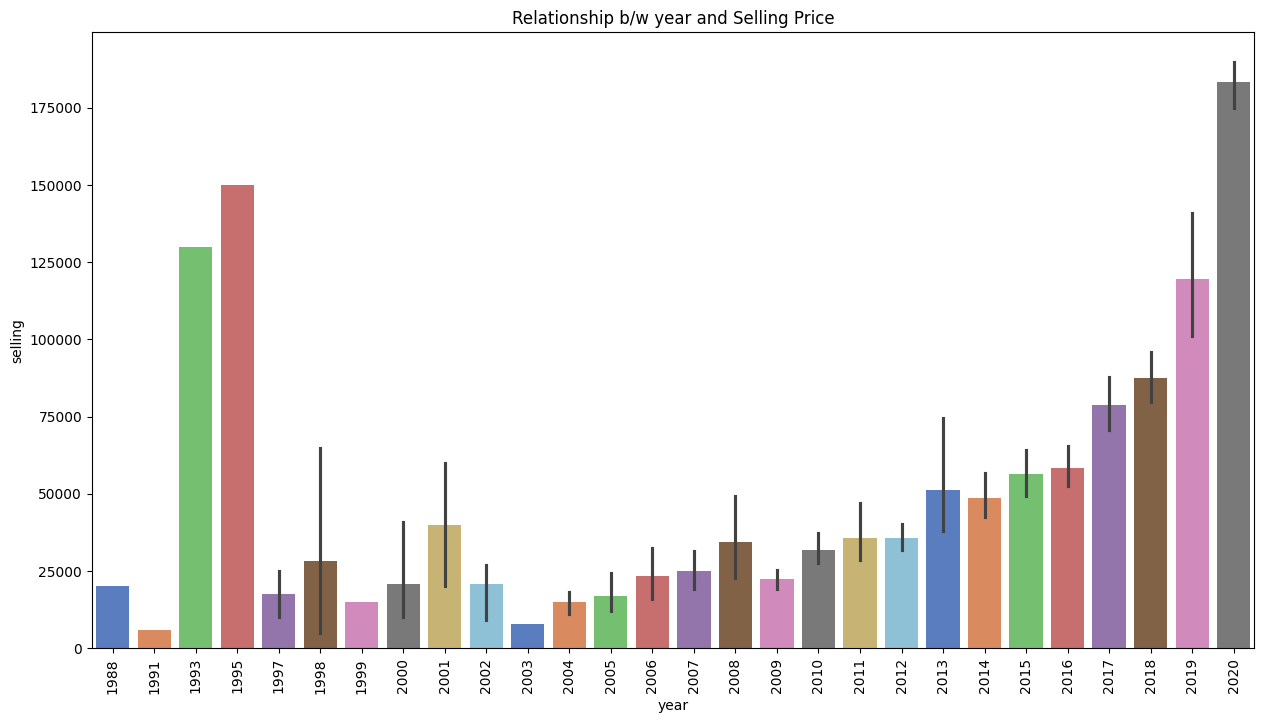

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'year', y = 'selling_price', data= df, palette = 'muted')
plt.xlabel('year')
plt.ylabel('selling')
plt.title('Relationship b/w year and Selling Price')
plt.xticks(rotation = 90)
plt.show()

13. What is the average depreciation in selling price based on the bike's age(Current year - maufacturing year)

In [ ]:
df['age'] = 2024 - df['year']

In [ ]:
df['deprication'] = abs(df['selling_price'] - df['ex_showroom_price'])

In [ ]:
df.groupby('age')['deprication'].mean()

,deprication
age,
4,34260.000000
5,9588.062500
6,15689.636364
7,22837.282353
8,28342.190476
9,28148.150000
10,35161.333333
11,43113.490566
12,37317.648649


14. Which bike names are prices significantly above the average price for their manufaturing year?

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'age', 'deprication'],
      dtype='object')

15. Develop a correlation matrix for numeric columns and visualize it using heatmap.

In [ ]:
corr1 = df.corr(numeric_only = True)

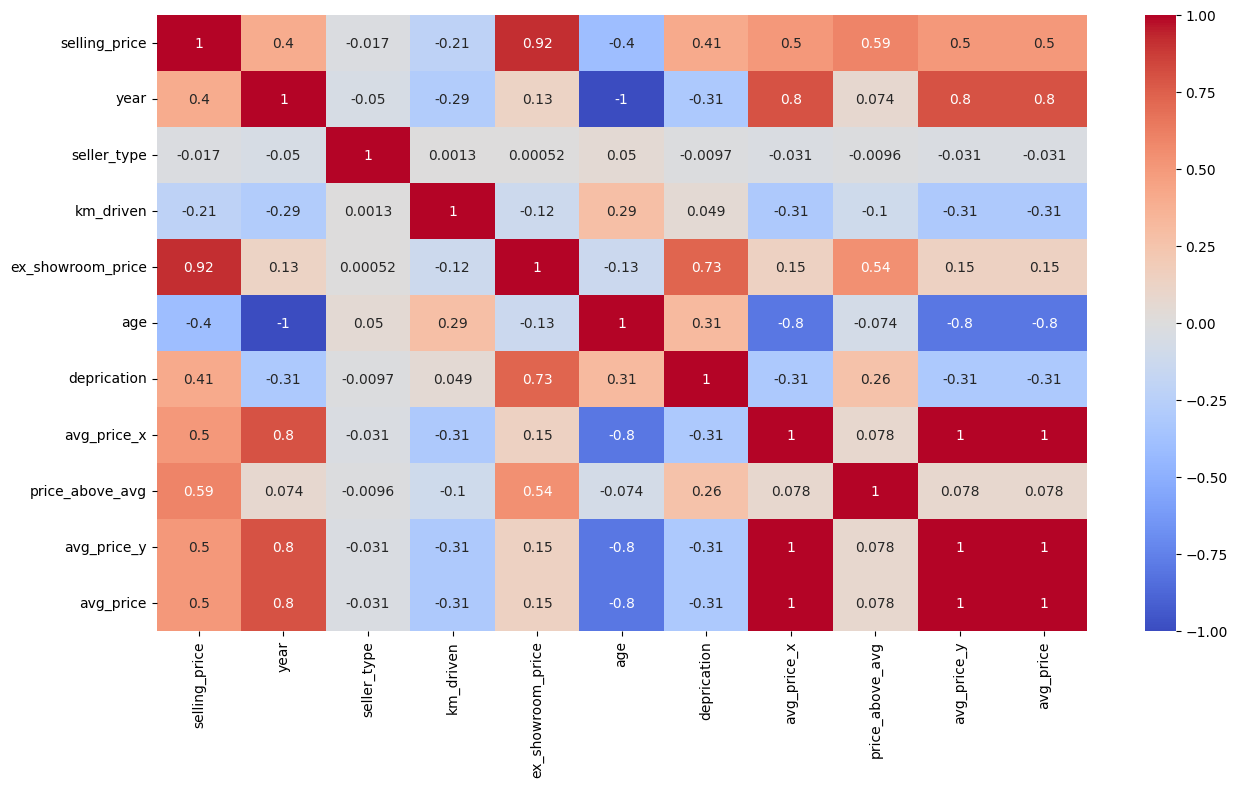

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.show()